<a href="https://colab.research.google.com/github/dganguli/tlon/blob/master/train_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train a CNN and a CGAN on MNIST Data

The CNN is used to classify MNIST digits

The cGAN is used to generate synthetic MNIST digits

This notebook trains both networks and saves the trained models for subsequent analysis. Code for model definitions are cloned from: https://github.com/dganguli/tlon

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import time
import torch

import matplotlib.pyplot as plt

print("torch cuda is available: {}".format(torch.cuda.is_available()))
print("number of gpus: {}".format(torch.cuda.device_count()))
print("1st gpu is of type: {}".format(torch.cuda.get_device_name(0)))

torch cuda is available: True
number of gpus: 1
1st gpu is of type: Tesla T4


In [2]:
import sys
! git clone https://github.com/dganguli/tlon.git
%cd /content/tlon/
! git pull
sys.path.append('/content/tlon')

!pip install showit

Cloning into 'tlon'...
remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 88 (delta 48), reused 57 (delta 25), pack-reused 0
Unpacking objects: 100% (88/88), done.
/content/tlon
Already up to date.
  Created wheel for showit: filename=showit-1.1.4-cp36-none-any.whl size=3642 sha256=b9651a3297fee07cbbd4591dd630e54e8057b80c3d365c8cf8494137522555ec
  Stored in directory: /root/.cache/pip/wheels/c9/60/f6/132ceb04843c22c202133ae966fc8fc1b7950aac6372e65d30
Successfully built showit


# Download MNIST training data

In [3]:
from data import load_mnist
from cnn import CNNTrainer

random_seed = 1
torch.manual_seed(random_seed)

train_loader, test_loader = load_mnist('/tmp')


Extracting /tmp/MNIST/raw/train-images-idx3-ubyte.gz to /tmp/MNIST/raw



Extracting /tmp/MNIST/raw/train-labels-idx1-ubyte.gz to /tmp/MNIST/raw



Extracting /tmp/MNIST/raw/t10k-images-idx3-ubyte.gz to /tmp/MNIST/raw



Extracting /tmp/MNIST/raw/t10k-labels-idx1-ubyte.gz to /tmp/MNIST/raw
Processing...
Done!


# Train a CNN on MNIST data

In [4]:
cnn_trainer = CNNTrainer(train_loader, test_loader, save_path='/content')

start = time.time()
cnn_trainer.train(log_interval=100)
elapsed = time.time()
total = elapsed-start
print("time elapsed: {} seconds".format(total))


Test set: Avg. loss: 2.3169, Accuracy: 1135/10000 (11%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.329414
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.266296
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.965345
Train Epoch: 1 [19200/60000 (32%)]	Loss: 1.497421
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.126295
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.890962
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.668660
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.658087
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.505308
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.374695

Test set: Avg. loss: 0.2441, Accuracy: 9281/10000 (93%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.487649
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.390599
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.383960
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.453645
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.203565
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.261903
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.467160
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.233

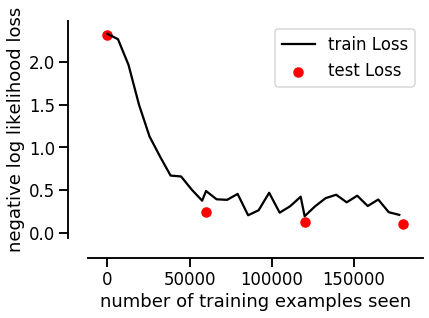

In [6]:
sns.set_context('talk')
fig = plt.figure()
plt.plot(cnn_trainer.train_counter, cnn_trainer.train_losses, 'k')
plt.scatter(cnn_trainer.test_counter, cnn_trainer.test_losses, color='r')
plt.legend(['train Loss', 'test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
sns.despine(offset=20)

# Train a cGAN to generate synthetic data

In [8]:
from cgan import CGANTrainer

cgan_trainer = CGANTrainer(train_loader, 
                           save_path='/content',
                           n_epochs=20
                           )

start = time.time()
cgan_trainer.train(log_interval=1000)
elapsed = time.time()
total = elapsed-start
print("time elapsed: {} seconds".format(total))

Sending models to gpu
[Epoch 1/20] [Batch 0/938] [D loss: 0.526873] [G loss: 1.025451]
[Epoch 2/20] [Batch 0/938] [D loss: 0.076316] [G loss: 0.543623]
[Epoch 3/20] [Batch 0/938] [D loss: 0.098292] [G loss: 0.722259]
[Epoch 4/20] [Batch 0/938] [D loss: 0.109037] [G loss: 0.519179]
[Epoch 5/20] [Batch 0/938] [D loss: 0.123392] [G loss: 0.541854]
[Epoch 6/20] [Batch 0/938] [D loss: 0.119198] [G loss: 0.564595]
[Epoch 7/20] [Batch 0/938] [D loss: 0.121358] [G loss: 0.481312]
[Epoch 8/20] [Batch 0/938] [D loss: 0.123017] [G loss: 0.494519]
[Epoch 9/20] [Batch 0/938] [D loss: 0.163460] [G loss: 0.338300]
[Epoch 10/20] [Batch 0/938] [D loss: 0.152001] [G loss: 0.434674]
[Epoch 11/20] [Batch 0/938] [D loss: 0.186481] [G loss: 0.302928]
[Epoch 12/20] [Batch 0/938] [D loss: 0.196315] [G loss: 0.496282]
[Epoch 13/20] [Batch 0/938] [D loss: 0.178939] [G loss: 0.369107]
[Epoch 14/20] [Batch 0/938] [D loss: 0.176525] [G loss: 0.361235]
[Epoch 15/20] [Batch 0/938] [D loss: 0.180986] [G loss: 0.40397

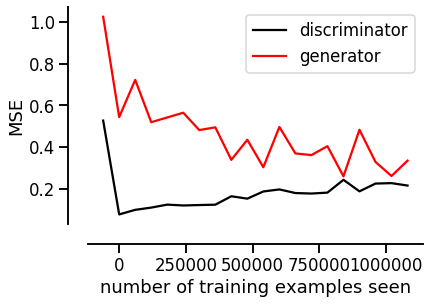

In [11]:
sns.set_context('talk')
fig = plt.figure()
plt.plot(cgan_trainer.train_counter, cgan_trainer.train_losses_discriminator, 'k')
plt.plot(cgan_trainer.train_counter, cgan_trainer.train_losses_generator, 'r')
plt.legend(['discriminator', 'generator'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('MSE')
sns.despine(offset=20)

# Visualize synthetic images from the trained cGAN

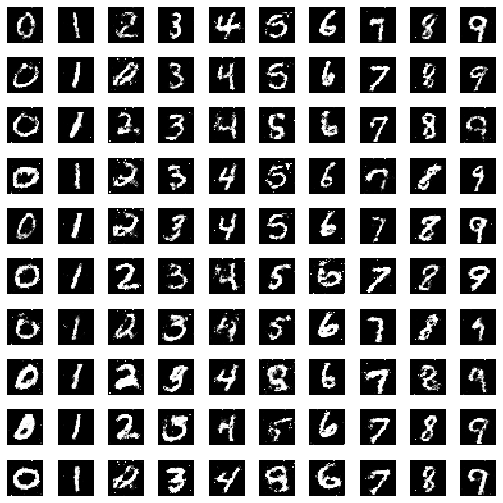

In [10]:
from torch.autograd import Variable
from showit import tile

cuda = True if torch.cuda.is_available() else False
FloatTensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor
LongTensor = torch.cuda.LongTensor if cuda else torch.LongTensor
n=10
latent_dim=100

z = Variable(FloatTensor(np.random.normal(0, 1, (n**2, latent_dim))))
labels = np.array([num for _ in range(n) for num in range(n)])

labels = Variable(LongTensor(labels))
out = cgan_trainer.generator(z,labels)

out = out.data.cpu().numpy().squeeze(axis=1)
tile(out);